# UFO Sightings Analysis
# Highlighted Reports
## Team Martianas (Angelica, Taryn, Tiffany)
### "NUFORC staff review each report, and highlight a small subset of what we feel to be the most credible or interesting cases. "

In [1]:
import pandas as pd
import numpy as np
import requests as rs
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup# as soup
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [2]:
# Initialize Chrome webdriver
driver = webdriver.Chrome() 
base_url = "https://nuforc.org/subndx/?id=highlights"
driver.get(base_url)

# Initialize lists to store headers and data
headers = []
data = []

# Need to Loop through all website pages
while True:
    # Get the current page HTML
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # Table Data
    table = soup.find('table')
    if not headers:  # Need this because only need the headers once as they are the same
        headers = [th.text.strip() for th in table.find_all('th')]

    # Data rows
    data_rows = table.find_all('tr')[1:]  # This Skips the header row
    for row in data_rows:
        data.append([td.text.strip() for td in row.find_all('td')])  # Include all columns

    # Need to wait for the next button
    next_button = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, "table_1_next"))
    )

#     # Check if the next button is disabled
    if 'disabled' in next_button.get_attribute('class'):
        break  # Break loop if next button is disabled

    # Click the next button
    next_button.click()

# Close the webdriver
driver.quit()



In [3]:
df = pd.DataFrame(data,columns=headers)
df.head()

,Link,Occurred,City,State,Country,Shape,Summary,Reported,Posted,Media
0,Open !,12/29/1994 21:45,La Crosse,WA,USA,Chevron,"Three seemingly identical black, delta-shaped,...",01/01/1995,11/20/2001,Y
1,Open !,08/25/1995 00:40,Greensburg,PA,USA,,Experienced UFO investigator calls to report r...,08/24/1995,11/02/1999,
2,Open !,05/27/1997 11:33,,,Australia,Rectangle,a black metallic mass that looked similar to a...,03/03/1997,03/07/1998,
3,Open !,06/15/1977 03:00,"U.S.Navy-USS Glover AGFF-1-Burmuda Triangle, FL",,Puerto Rico/Burmuda (between),Circle,I was on watch above the bridge port side when...,09/29/1999,10/02/1999,
4,Open !,01/24/2003 18:13,Kingston (Canada),ON,Canada,Triangle,black equilateral triangle with 3 glowing whit...,01/31/2003,02/05/2003,Y


In [4]:
df.tail()

,Link,Occurred,City,State,Country,Shape,Summary,Reported,Posted,Media
3025,Open !,10/12/2023 23:40,Carrollton,TX,USA,Unknown,A blinding light shown down on my house even t...,,None,None
3026,Open !,10/12/2023 20:35,Waynesfield,OH,USA,Triangle,"Huge, triangular craft, bright strobing lights...",,None,None
3027,Open !,10/09/2023 03:30,Idaho Falls,ID,USA,Triangle,Orange lights in the sky with smooth but rando...,,None,None
3028,Open !,10/08/2023 19:37,Powell Butte,OR,USA,Disk,Large disk,,None,None
3029,,,,,,,,,None,None


In [5]:
num_rows = len(df)
num_rows

3030

In [6]:
# Cleaning- Do not need these columns to answer questions
df = pd.DataFrame(data,columns=headers).drop(columns=['Link','Media', 'Posted'])
df.head()

,Occurred,City,State,Country,Shape,Summary,Reported
0,12/29/1994 21:45,La Crosse,WA,USA,Chevron,"Three seemingly identical black, delta-shaped,...",01/01/1995
1,08/25/1995 00:40,Greensburg,PA,USA,,Experienced UFO investigator calls to report r...,08/24/1995
2,05/27/1997 11:33,,,Australia,Rectangle,a black metallic mass that looked similar to a...,03/03/1997
3,06/15/1977 03:00,"U.S.Navy-USS Glover AGFF-1-Burmuda Triangle, FL",,Puerto Rico/Burmuda (between),Circle,I was on watch above the bridge port side when...,09/29/1999
4,01/24/2003 18:13,Kingston (Canada),ON,Canada,Triangle,black equilateral triangle with 3 glowing whit...,01/31/2003


In [7]:
# Will need to change Occured and reported to date time
datatypes = df.dtypes 
datatypes

Occurred    object
City        object
State       object
Country     object
Shape       object
Summary     object
Reported    object
dtype: object

In [8]:
Reported = df['Reported'].value_counts()
print(Reported)

              1828
Y             1102
11/27/2021       4
05/12/2016       2
06/06/2016       1
              ... 
04/25/2007       1
03/30/2007       1
01/16/2007       1
10/27/2006       1
02/02/2015       1
Name: Reported, Length: 98, dtype: int64


In [9]:
Occurred = df['Occurred'].value_counts()
print(Occurred)

01/27/2024 03:00    58
                    31
10/08/2023 19:37    29
12/16/2023 20:50    29
01/08/2024 01:00    29
                    ..
12/15/2016 20:00     1
06/15/1997 18:00     1
01/28/2017 20:50     1
06/20/2015 13:30     1
11/23/2021 20:30     1
Name: Occurred, Length: 199, dtype: int64


In [10]:
country_list = df['Country'].value_counts()
print(country_list)

USA                              2627
Canada                             62
United Kingdom                     60
Brazil                             58
Unspecified                        40
                                   30
Australia                          30
Mexico                             29
International Waters               29
Türkiye                            29
Oman                               29
Algeria                             1
Internatonal Waters                 1
Singapore                           1
South Africa                        1
Atlantic Ocean                      1
Puerto Rico/Burmuda (between)       1
China                               1
Name: Country, dtype: int64


In [11]:
state_list = df['State'].value_counts()
print(state_list)

AZ                   208
FL                   147
                     138
PA                   119
IL                   118
TX                   117
WA                    95
NC                    91
MN                    91
OH                    90
OK                    90
OR                    89
MD                    89
KS                    88
NE                    87
CA                    67
ON                    60
VA                    60
MI                    60
NY                    59
GA                    59
WI                    59
AL                    59
CT                    58
England               58
AR                    58
IN                    58
ID                    58
CO                    32
KY                    31
NJ                    30
MA                    30
MS                    30
WY                    29
NH                    29
Yucatan               29
UT                    29
SC                    29
ME                    29
SD                    29


In [12]:
city_list = df['City'].value_counts()
print(city_list)

                                     239
Lincolnshire                          58
Oklahoma City                         58
Stillwater                            30
Santa Fe                              30
                                    ... 
Huntington Beach                       1
Lahaina                                1
Davie                                  1
Borrego Springs                        1
Nr. Town of Porthmadog (UK/Wales)      1
Name: City, Length: 181, dtype: int64


In [13]:
shape_list = df['Shape'].value_counts()
print(shape_list)

Light        757
Triangle     432
Orb          409
Disk         301
Sphere       153
Unknown      147
Other        118
Rectangle     93
Cigar         91
Formation     90
Diamond       90
Cylinder      62
Changing      59
              38
Circle        35
Chevron       34
Teardrop      30
Oval          29
Star          29
Fireball      29
Egg            3
Cross          1
Name: Shape, dtype: int64


In [14]:
df.shape

(3030, 7)

In [15]:
# Split Occured column to Date and Time
df[['Date Occured','Time Occured']]=df.Occurred.str.split(' ',expand=True)
df

,Occurred,City,State,Country,Shape,Summary,Reported,Date Occured,Time Occured
0,12/29/1994 21:45,La Crosse,WA,USA,Chevron,"Three seemingly identical black, delta-shaped,...",01/01/1995,12/29/1994,21:45
1,08/25/1995 00:40,Greensburg,PA,USA,,Experienced UFO investigator calls to report r...,08/24/1995,08/25/1995,00:40
2,05/27/1997 11:33,,,Australia,Rectangle,a black metallic mass that looked similar to a...,03/03/1997,05/27/1997,11:33
3,06/15/1977 03:00,"U.S.Navy-USS Glover AGFF-1-Burmuda Triangle, FL",,Puerto Rico/Burmuda (between),Circle,I was on watch above the bridge port side when...,09/29/1999,06/15/1977,03:00
4,01/24/2003 18:13,Kingston (Canada),ON,Canada,Triangle,black equilateral triangle with 3 glowing whit...,01/31/2003,01/24/2003,18:13
...,...,...,...,...,...,...,...,...,...
3025,10/12/2023 23:40,Carrollton,TX,USA,Unknown,A blinding light shown down on my house even t...,,10/12/2023,23:40
3026,10/12/2023 20:35,Waynesfield,OH,USA,Triangle,"Huge, triangular craft, bright strobing lights...",,10/12/2023,20:35
3027,10/09/2023 03:30,Idaho Falls,ID,USA,Triangle,Orange lights in the sky with smooth but rando...,,10/09/2023,03:30
3028,10/08/2023 19:37,Powell Butte,OR,USA,Disk,Large disk,,10/08/2023,19:37


In [16]:
clean_df = df[['Date Occured', 'Time Occured', 'City', 'State', 'Country', 'Shape', 'Summary' ]]

clean_df.head()

,Date Occured,Time Occured,City,State,Country,Shape,Summary
0,12/29/1994,21:45,La Crosse,WA,USA,Chevron,"Three seemingly identical black, delta-shaped,..."
1,08/25/1995,00:40,Greensburg,PA,USA,,Experienced UFO investigator calls to report r...
2,05/27/1997,11:33,,,Australia,Rectangle,a black metallic mass that looked similar to a...
3,06/15/1977,03:00,"U.S.Navy-USS Glover AGFF-1-Burmuda Triangle, FL",,Puerto Rico/Burmuda (between),Circle,I was on watch above the bridge port side when...
4,01/24/2003,18:13,Kingston (Canada),ON,Canada,Triangle,black equilateral triangle with 3 glowing whit...


# USA Sightings vs Other Countries

In [17]:
num_countries = clean_df['Country'].nunique()
num_countries 

18

In [18]:
countries_count = clean_df['Country'].value_counts()
countries_count

USA                              2627
Canada                             62
United Kingdom                     60
Brazil                             58
Unspecified                        40
                                   30
Australia                          30
Mexico                             29
International Waters               29
Türkiye                            29
Oman                               29
Algeria                             1
Internatonal Waters                 1
Singapore                           1
South Africa                        1
Atlantic Ocean                      1
Puerto Rico/Burmuda (between)       1
China                               1
Name: Country, dtype: int64

In [19]:
country_activity = clean_df.groupby('Country').size().sort_values(ascending=False)
country_activity



Country
USA                              2627
Canada                             62
United Kingdom                     60
Brazil                             58
Unspecified                        40
                                   30
Australia                          30
International Waters               29
Oman                               29
Türkiye                            29
Mexico                             29
China                               1
Internatonal Waters                 1
Algeria                             1
Puerto Rico/Burmuda (between)       1
Singapore                           1
South Africa                        1
Atlantic Ocean                      1
dtype: int64

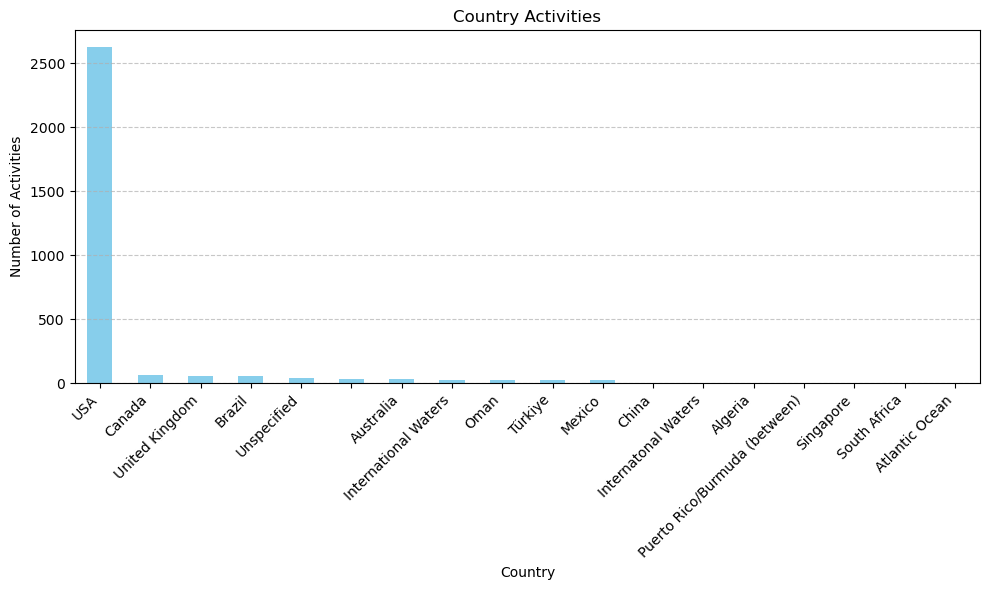

In [20]:
# Bar Plot
plt.figure(figsize=(10, 6)) 
country_activity.plot(kind='bar', color='skyblue')  
plt.title('Country Activities')  
plt.xlabel('Country')  
plt.ylabel('Number of Activities')  
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()

# USA States (Highest and Lowest Sightings)

In [21]:
usa_data = clean_df[clean_df['Country'] == 'USA']
usa_data

,Date Occured,Time Occured,City,State,Country,Shape,Summary
0,12/29/1994,21:45,La Crosse,WA,USA,Chevron,"Three seemingly identical black, delta-shaped,..."
1,08/25/1995,00:40,Greensburg,PA,USA,,Experienced UFO investigator calls to report r...
5,03/08/2003,20:15,Greenbelt area,MD,USA,Chevron,Totally Silent 'Flying Wing' Seen Twice Within...
6,05/01/2003,22:00,Seattle (West Seattle),WA,USA,Triangle,"Silent, triangular craft sighted over West Sea..."
7,02/16/2003,23:00,Seattle (Juanita area),WA,USA,,
...,...,...,...,...,...,...,...
3024,10/13/2023,19:00,"Sonoita, Arizona",AZ,USA,Light,Bright light lasting for 5 to 6 total Mississi...
3025,10/12/2023,23:40,Carrollton,TX,USA,Unknown,A blinding light shown down on my house even t...
3026,10/12/2023,20:35,Waynesfield,OH,USA,Triangle,"Huge, triangular craft, bright strobing lights..."
3027,10/09/2023,03:30,Idaho Falls,ID,USA,Triangle,Orange lights in the sky with smooth but rando...


In [22]:
usa_data = clean_df[clean_df['Country'] == 'USA']

# Create a new DataFrame for just values under Country-USA
usa_df = pd.DataFrame(usa_data)
usa_df

,Date Occured,Time Occured,City,State,Country,Shape,Summary
0,12/29/1994,21:45,La Crosse,WA,USA,Chevron,"Three seemingly identical black, delta-shaped,..."
1,08/25/1995,00:40,Greensburg,PA,USA,,Experienced UFO investigator calls to report r...
5,03/08/2003,20:15,Greenbelt area,MD,USA,Chevron,Totally Silent 'Flying Wing' Seen Twice Within...
6,05/01/2003,22:00,Seattle (West Seattle),WA,USA,Triangle,"Silent, triangular craft sighted over West Sea..."
7,02/16/2003,23:00,Seattle (Juanita area),WA,USA,,
...,...,...,...,...,...,...,...
3024,10/13/2023,19:00,"Sonoita, Arizona",AZ,USA,Light,Bright light lasting for 5 to 6 total Mississi...
3025,10/12/2023,23:40,Carrollton,TX,USA,Unknown,A blinding light shown down on my house even t...
3026,10/12/2023,20:35,Waynesfield,OH,USA,Triangle,"Huge, triangular craft, bright strobing lights..."
3027,10/09/2023,03:30,Idaho Falls,ID,USA,Triangle,Orange lights in the sky with smooth but rando...


In [23]:
datatypes = df.dtypes 
datatypes

Occurred        object
City            object
State           object
Country         object
Shape           object
Summary         object
Reported        object
Date Occured    object
Time Occured    object
dtype: object

In [24]:
usa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2627 entries, 0 to 3028
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date Occured  2627 non-null   object
 1   Time Occured  2627 non-null   object
 2   City          2627 non-null   object
 3   State         2627 non-null   object
 4   Country       2627 non-null   object
 5   Shape         2627 non-null   object
 6   Summary       2627 non-null   object
dtypes: object(7)
memory usage: 164.2+ KB


In [25]:
usa_df['Date Occured'] = pd.to_datetime(usa_df['Date Occured'])
print(usa_df.dtypes)

Date Occured    datetime64[ns]
Time Occured            object
City                    object
State                   object
Country                 object
Shape                   object
Summary                 object
dtype: object


In [26]:
usa_df['Time Occured'] = pd.to_datetime(usa_df['Time Occured']).dt.time
print(usa_df.dtypes)

Date Occured    datetime64[ns]
Time Occured            object
City                    object
State                   object
Country                 object
Shape                   object
Summary                 object
dtype: object


In [27]:
time_values = usa_df['Time Occured'].value_counts()
time_values

19:00:00    117
03:00:00    116
21:00:00     89
21:15:00     87
03:30:00     87
           ... 
10:30:00      1
08:20:00      1
05:15:00      1
23:30:00      1
21:45:00      1
Name: Time Occured, Length: 107, dtype: int64

In [28]:
state_counts = usa_df['State'].value_counts()
state_counts

AZ    208
FL    147
PA    119
IL    118
TX    117
WA     95
MN     91
NC     91
OK     90
OH     90
OR     89
MD     89
KS     88
NE     87
CA     67
MI     60
VA     60
WI     59
GA     59
AL     59
NY     59
ID     58
IN     58
AR     58
CT     58
CO     32
KY     31
NJ     30
MA     30
MS     30
UT     29
WY     29
SC     29
SD     29
ME     29
NV     29
NH     29
DC     29
-      29
WV     29
NM      4
MO      3
HI      2
PR      1
Name: State, dtype: int64

## Top 5

In [29]:
top_5_states = state_counts.head(5)
top_5_states

AZ    208
FL    147
PA    119
IL    118
TX    117
Name: State, dtype: int64

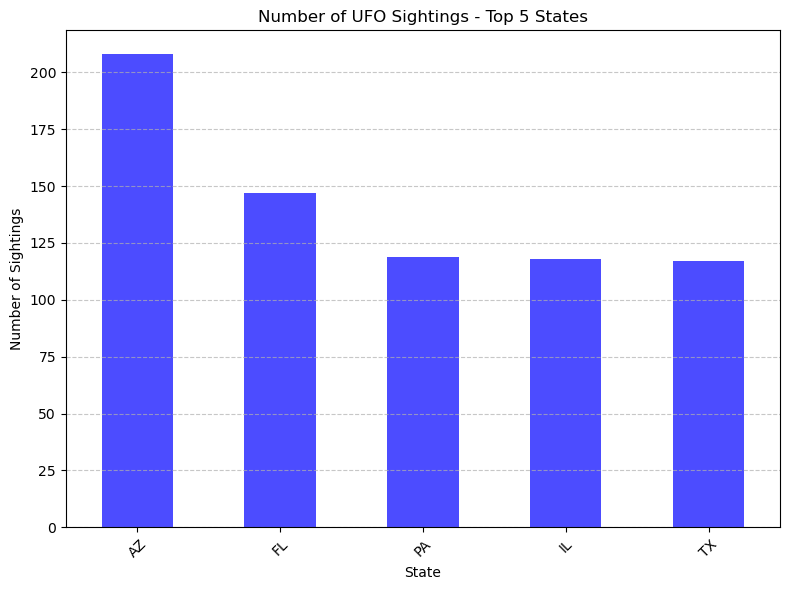

In [30]:
# Top 5 Graph

plt.figure(figsize=(8, 6))
top_5_states.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Number of UFO Sightings - Top 5 States')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Top 10

In [31]:
top_10_states = state_counts.head(10)
top_10_states

AZ    208
FL    147
PA    119
IL    118
TX    117
WA     95
MN     91
NC     91
OK     90
OH     90
Name: State, dtype: int64

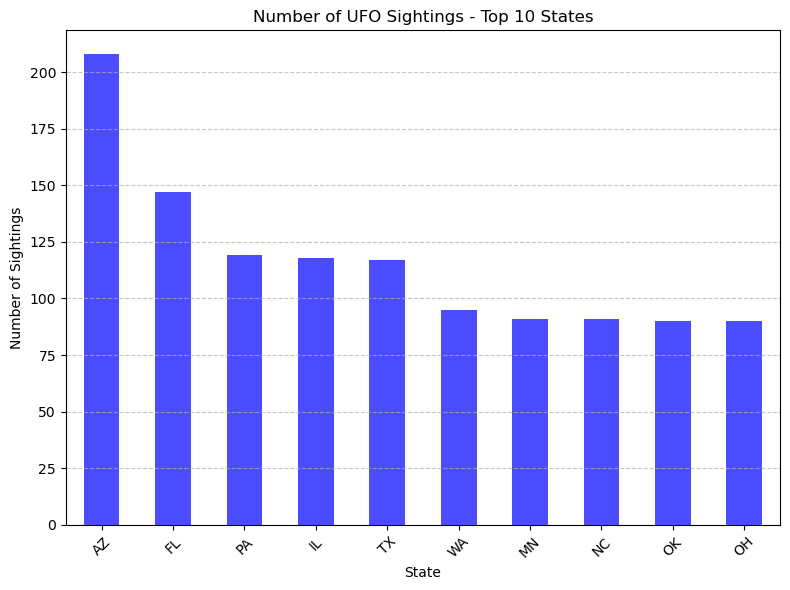

In [32]:
# Top 10 Graph

plt.figure(figsize=(8, 6))
top_10_states.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Number of UFO Sightings - Top 10 States')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Bottom 5

In [33]:
bottom_5_states = state_counts.tail(5)
bottom_5_states

WV    29
NM     4
MO     3
HI     2
PR     1
Name: State, dtype: int64

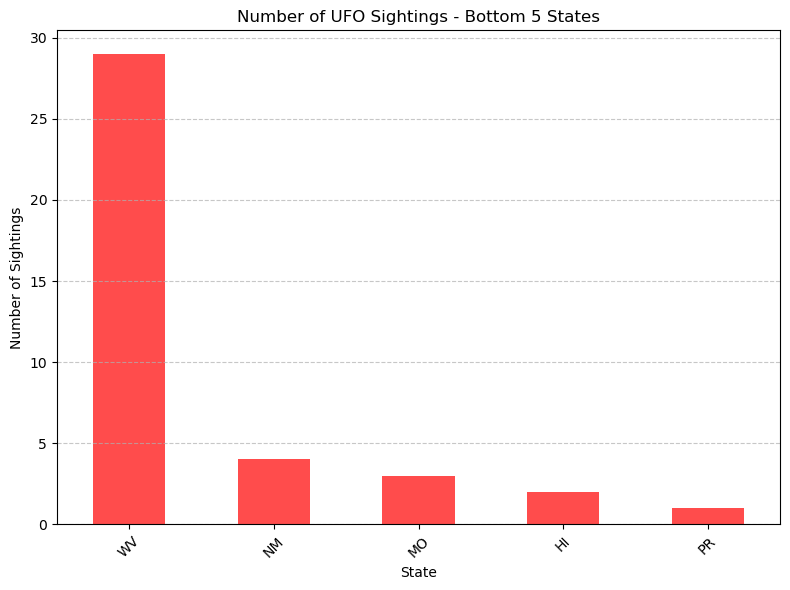

In [34]:
plt.figure(figsize=(8, 6))
bottom_5_states.plot(kind='bar', color='red', alpha=0.7)
plt.title('Number of UFO Sightings - Bottom 5 States')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Bottom 10


In [35]:
bottom_10_states = state_counts.tail(10)
bottom_10_states

ME    29
NV    29
NH    29
DC    29
-     29
WV    29
NM     4
MO     3
HI     2
PR     1
Name: State, dtype: int64

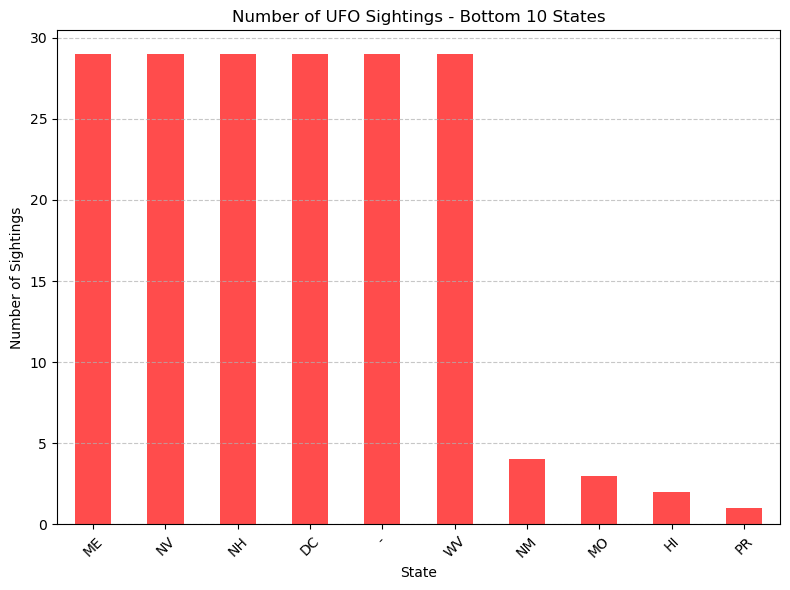

In [36]:
plt.figure(figsize=(8, 6))
bottom_10_states.plot(kind='bar', color='red', alpha=0.7)
plt.title('Number of UFO Sightings - Bottom 10 States')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##  Combined Top 5 and Bottom 5

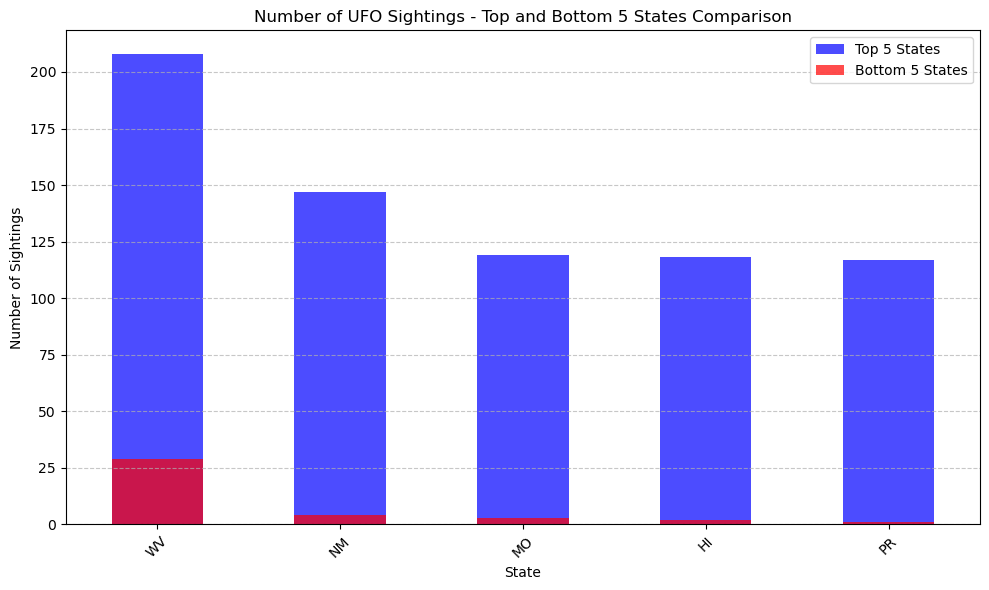

In [37]:
# Combined
plt.figure(figsize=(10, 6))
top_5_states.plot(kind='bar', color='blue', alpha=0.7, label='Top 5 States')
bottom_5_states.plot(kind='bar', color='red', alpha=0.7, label='Bottom 5 States')
plt.title('Number of UFO Sightings - Top and Bottom 5 States Comparison')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##  Combined Top 10 and Bottom 10

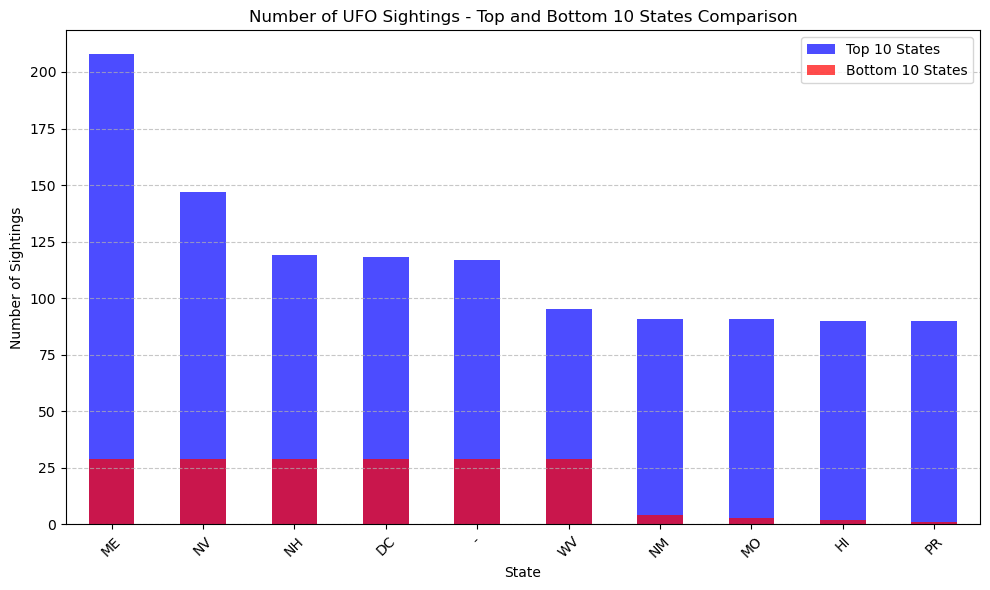

In [38]:
# Combined
plt.figure(figsize=(10, 6))
top_10_states.plot(kind='bar', color='blue', alpha=0.7, label='Top 10 States')
bottom_10_states.plot(kind='bar', color='red', alpha=0.7, label='Bottom 10 States')
plt.title('Number of UFO Sightings - Top and Bottom 10 States Comparison')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# USA- Shapes

In [39]:
shape_counts = usa_df['Shape'].value_counts()
shape_counts

Light        640
Orb          379
Triangle     367
Disk         270
Unknown      145
Sphere       122
Rectangle     92
Formation     90
Other         89
Diamond       61
Cylinder      61
Cigar         61
Changing      59
Chevron       34
Circle        34
Teardrop      30
Oval          29
Star          29
Fireball      29
               3
Egg            2
Cross          1
Name: Shape, dtype: int64

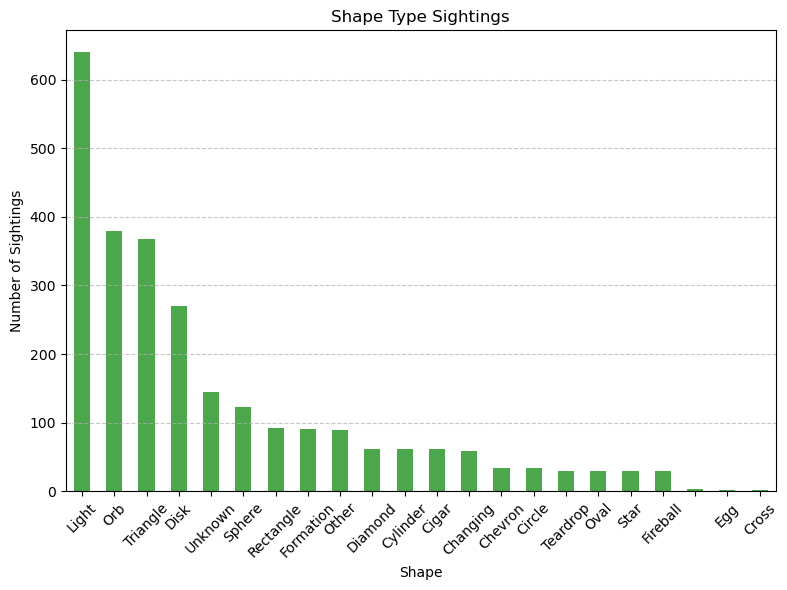

In [40]:
plt.figure(figsize=(8, 6))
shape_counts.plot(kind='bar', color='green', alpha=0.7)
plt.title('Shape Type Sightings')
plt.xlabel('Shape')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Arizona Reports

In [41]:
az_data = usa_df[usa_df['State'] == 'AZ']
az_data

,Date Occured,Time Occured,City,State,Country,Shape,Summary
37,2010-06-02,21:10:00,Tempe,AZ,USA,Disk,"Saucer shape, flying over Tempe, 6-7 white lig..."
49,2015-02-01,19:40:00,Tempe,AZ,USA,Triangle,"I live in Tempe, AZ, a city in the Phoenix met..."
70,2017-01-28,20:50:00,Sahuarita,AZ,USA,Formation,"Formation of steady, orange lights east of Sah..."
81,2018-10-04,21:30:00,SE Arizona (I-10 EB),AZ,USA,Disk,Translucent saucer shaped object with bright P...
95,2020-02-21,19:30:00,Scottsdale,AZ,USA,Other,Bank of what looked like blacklight screens fl...
...,...,...,...,...,...,...,...
2982,2023-11-18,12:15:00,Oro Valley,AZ,USA,Sphere,Metallic UAP or Balloon
3005,2023-10-31,19:00:00,Casa Grande,AZ,USA,Light,Rectangular light fixed in the Northwestern sk...
3011,2023-10-24,09:33:00,Government Hill,AZ,USA,Triangle,Enormous white triangle craft with point strai...
3023,2023-10-13,19:03:00,Green Valley,AZ,USA,Orb,A very bright glowing white orb passed near ou...


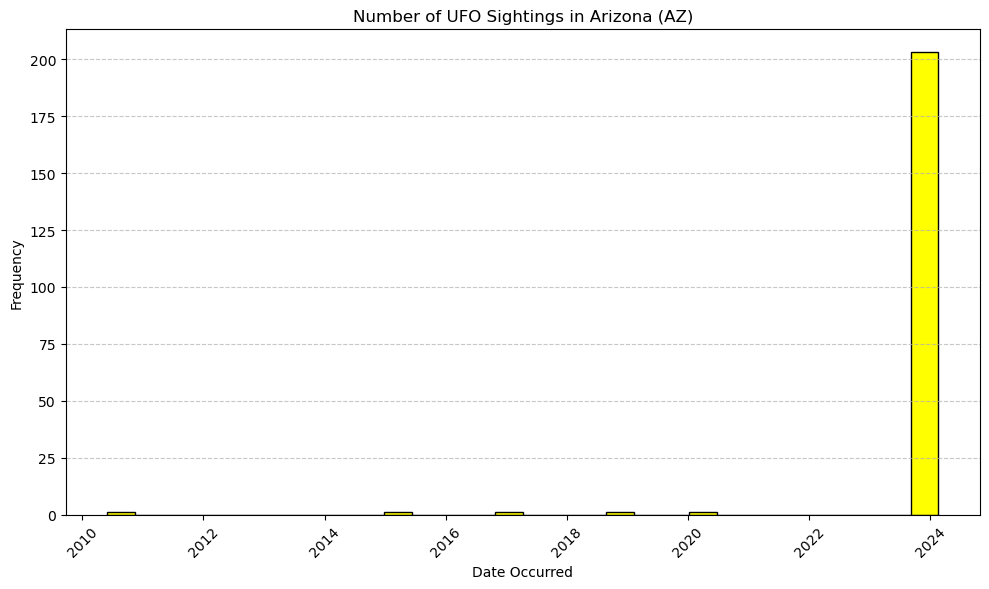

In [42]:
# Plotting
plt.figure(figsize=(10, 6))
plt.hist(az_data['Date Occured'], bins=30, color='yellow', edgecolor='black')
plt.title('Number of UFO Sightings in Arizona (AZ)')
plt.xlabel('Date Occurred')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Cities/Phoenix

In [43]:
# Count the number of sightings for each city in Arizona
city_counts = az_data['City'].value_counts()

# Sort the cities based on the number of sightings in descending order
sorted_cities = city_counts.sort_values(ascending=False)
print(sorted_cities)




Mesa                    29
Phoenix                 29
Oro Valley              29
Casa Grande             29
Government Hill         29
Green Valley            29
Sonoita, Arizona        29
Tempe                    2
Sahuarita                1
SE Arizona (I-10 EB)     1
Scottsdale               1
Name: City, dtype: int64


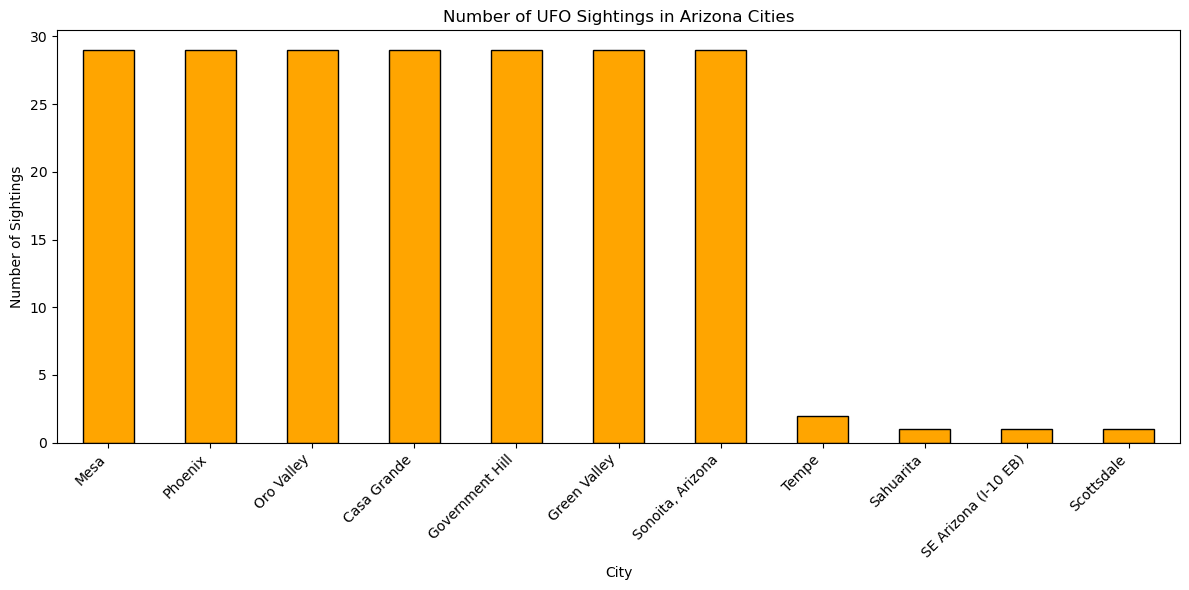

In [44]:
# Plotting
plt.figure(figsize=(12, 6))
sorted_cities.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Number of UFO Sightings in Arizona Cities')
plt.xlabel('City')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

In [45]:
## Phoenix
phx_data = usa_df[usa_df['City'] == 'Phoenix']
phx_data

,Date Occured,Time Occured,City,State,Country,Shape,Summary
125,2024-01-14,05:00:00,Phoenix,AZ,USA,Formation,Maneuvering lights at very high altitude views...
226,2024-01-14,05:00:00,Phoenix,AZ,USA,Formation,Maneuvering lights at very high altitude views...
327,2024-01-14,05:00:00,Phoenix,AZ,USA,Formation,Maneuvering lights at very high altitude views...
428,2024-01-14,05:00:00,Phoenix,AZ,USA,Formation,Maneuvering lights at very high altitude views...
529,2024-01-14,05:00:00,Phoenix,AZ,USA,Formation,Maneuvering lights at very high altitude views...
630,2024-01-14,05:00:00,Phoenix,AZ,USA,Formation,Maneuvering lights at very high altitude views...
731,2024-01-14,05:00:00,Phoenix,AZ,USA,Formation,Maneuvering lights at very high altitude views...
832,2024-01-14,05:00:00,Phoenix,AZ,USA,Formation,Maneuvering lights at very high altitude views...
933,2024-01-14,05:00:00,Phoenix,AZ,USA,Formation,Maneuvering lights at very high altitude views...
1034,2024-01-14,05:00:00,Phoenix,AZ,USA,Formation,Maneuvering lights at very high altitude views...


## Years

In [46]:
year_2022 = usa_df[usa_df['Date Occured'].dt.year == 2022]
year_2022

,Date Occured,Time Occured,City,State,Country,Shape,Summary


In [47]:
year_2023 = usa_df[usa_df['Date Occured'].dt.year == 2023]
year_2023

,Date Occured,Time Occured,City,State,Country,Shape,Summary
134,2023-12-26,20:40:00,Bunnell,FL,USA,Changing,What appeared as bright star like points of li...
136,2023-12-20,03:00:00,Horace,KS,USA,Unknown,4 white lights of changing intensity resemblin...
137,2023-12-16,22:45:00,Little Rock,AR,USA,Light,5 Lights Moving Rapidly and Changing Direction
138,2023-12-16,20:50:00,Ferndale,MI,USA,Sphere,A simple sighting which lasted one second.
139,2023-12-14,19:45:00,Pawleys Island,SC,USA,Triangle,4-5 orange solid lights arranged in a triangle...
...,...,...,...,...,...,...,...
3024,2023-10-13,19:00:00,"Sonoita, Arizona",AZ,USA,Light,Bright light lasting for 5 to 6 total Mississi...
3025,2023-10-12,23:40:00,Carrollton,TX,USA,Unknown,A blinding light shown down on my house even t...
3026,2023-10-12,20:35:00,Waynesfield,OH,USA,Triangle,"Huge, triangular craft, bright strobing lights..."
3027,2023-10-09,03:30:00,Idaho Falls,ID,USA,Triangle,Orange lights in the sky with smooth but rando...


In [48]:
year_2024 = usa_df[usa_df['Date Occured'].dt.year == 2024]
year_2024

,Date Occured,Time Occured,City,State,Country,Shape,Summary
101,2024-03-02,22:23:00,Beckley,WV,USA,Orb,My captain and I saw moving stars. Looked kind...
102,2024-02-28,22:00:00,Felton,CA,USA,Other,"Vaguely cube shaped, with multicolored lights ..."
104,2024-02-28,19:06:00,Manitowoc,WI,USA,Triangle,Light flicker on house then looked up and seen...
105,2024-02-27,21:00:00,,-,USA,Orb,Multiple orbs of light over the Pacific Ocean ...
106,2024-02-25,21:12:00,Washington,DC,USA,Light,White light illuminated stationary before rapi...
...,...,...,...,...,...,...,...
2954,2024-01-13,19:25:00,Charlotte,NC,USA,Triangle,An object with lights went back and forth
2956,2024-01-10,20:10:00,Yakima,WA,USA,Light,"Flying from DEN to PSC at 34,000’. Witnessed m..."
2958,2024-01-07,20:40:00,Roseburg,OR,USA,Light,2 lights looked to be spinning.
2960,2024-01-02,22:40:00,Oklahoma City,OK,USA,Oval,Seen the blue white oval object dart right to ...


In [49]:
yearly_counts_2022 = year_2022.groupby(year_2022['Date Occured'].dt.date).size()
yearly_counts_2022

Series([], dtype: int64)

In [50]:
yearly_counts_2023 = year_2023.groupby(year_2023['Date Occured'].dt.date).size()
yearly_counts_2023




Date Occured
2023-10-08     29
2023-10-09     29
2023-10-12     58
2023-10-13     58
2023-10-14     29
2023-10-16     29
2023-10-17     29
2023-10-18     29
2023-10-19     87
2023-10-21     29
2023-10-22     29
2023-10-24     58
2023-10-27     29
2023-10-29     29
2023-10-30     29
2023-10-31     29
2023-11-02     29
2023-11-05     87
2023-11-06     29
2023-11-08     58
2023-11-09     87
2023-11-10     29
2023-11-11    116
2023-11-12     29
2023-11-13     58
2023-11-14     29
2023-11-15     29
2023-11-16     29
2023-11-17     29
2023-11-18     29
2023-11-20     29
2023-11-21     58
2023-11-24     29
2023-11-25     29
2023-11-26     29
2023-11-28     29
2023-11-30     58
2023-12-03     29
2023-12-04     29
2023-12-08     29
2023-12-13     29
2023-12-14     29
2023-12-16     58
2023-12-20     29
2023-12-26     29
dtype: int64

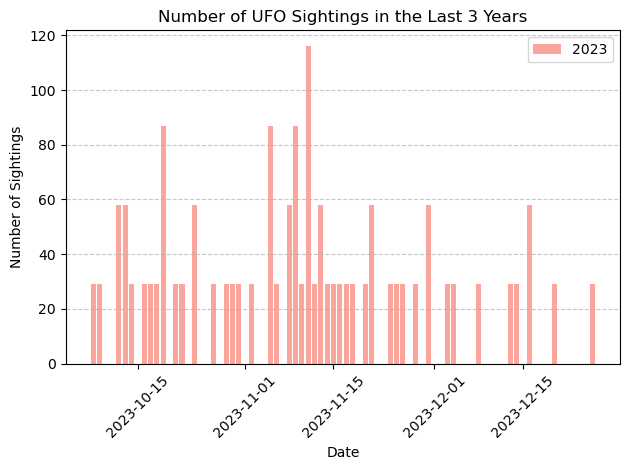

In [51]:
plt.bar(yearly_counts_2023.index, yearly_counts_2023, label='2023', color='salmon', alpha=0.7)
plt.title('Number of UFO Sightings in the Last 3 Years')
plt.xlabel('Date')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [52]:
yearly_counts_2024 = year_2024.groupby(year_2024['Date Occured'].dt.date).size()
yearly_counts_2024

Date Occured
2024-01-02    58
2024-01-07    29
2024-01-10    29
2024-01-13    29
2024-01-14    58
2024-01-16    29
2024-01-17    29
2024-01-21    29
2024-01-27    58
2024-02-01    29
2024-02-05    58
2024-02-06    58
2024-02-16    29
2024-02-17    29
2024-02-18    29
2024-02-19    29
2024-02-25    29
2024-02-27    29
2024-02-28    58
2024-03-02    29
dtype: int64

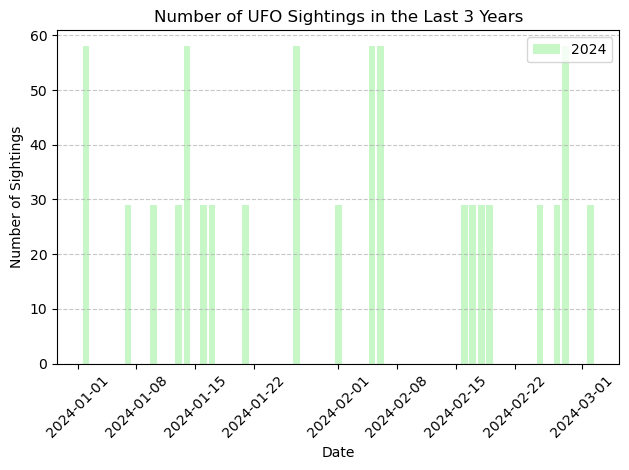

In [53]:
plt.bar(yearly_counts_2024.index, yearly_counts_2024, label='2024', color='lightgreen', alpha=0.5)

plt.title('Number of UFO Sightings in the Last 3 Years')
plt.xlabel('Date')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [54]:
daily_counts_2023 = year_2023.groupby(year_2023['Date Occured'].dt.date).size()
daily_counts_2023


Date Occured
2023-10-08     29
2023-10-09     29
2023-10-12     58
2023-10-13     58
2023-10-14     29
2023-10-16     29
2023-10-17     29
2023-10-18     29
2023-10-19     87
2023-10-21     29
2023-10-22     29
2023-10-24     58
2023-10-27     29
2023-10-29     29
2023-10-30     29
2023-10-31     29
2023-11-02     29
2023-11-05     87
2023-11-06     29
2023-11-08     58
2023-11-09     87
2023-11-10     29
2023-11-11    116
2023-11-12     29
2023-11-13     58
2023-11-14     29
2023-11-15     29
2023-11-16     29
2023-11-17     29
2023-11-18     29
2023-11-20     29
2023-11-21     58
2023-11-24     29
2023-11-25     29
2023-11-26     29
2023-11-28     29
2023-11-30     58
2023-12-03     29
2023-12-04     29
2023-12-08     29
2023-12-13     29
2023-12-14     29
2023-12-16     58
2023-12-20     29
2023-12-26     29
dtype: int64

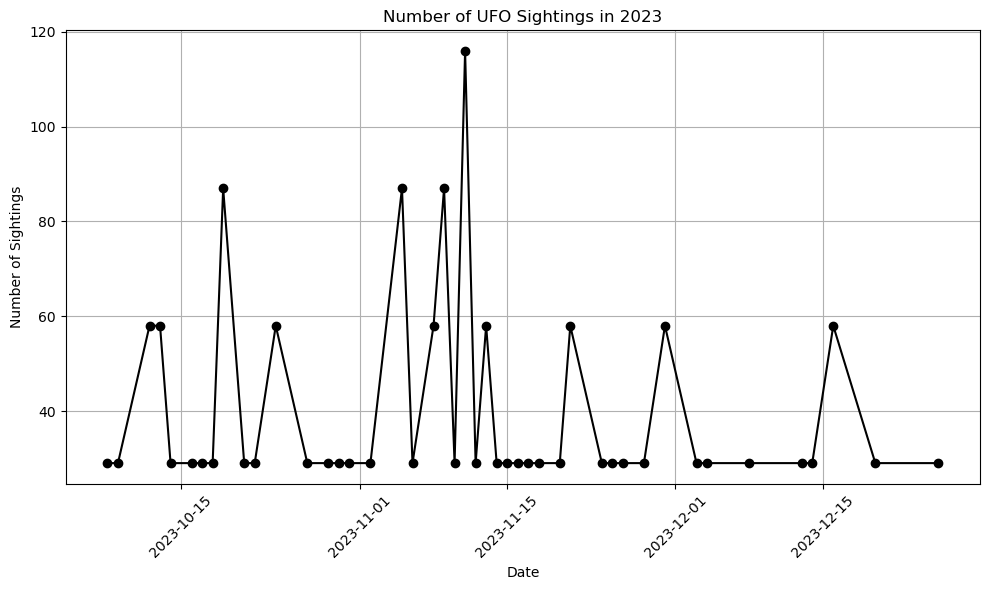

In [55]:
# Plotting 
plt.figure(figsize=(10, 6))
daily_counts_2023.plot(kind='line', marker='o', color='black')

plt.title('Number of UFO Sightings in 2023')
plt.xlabel('Date')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
daily_counts_2024 = year_2024.groupby(year_2024['Date Occured'].dt.date).size()
daily_counts_2024


Date Occured
2024-01-02    58
2024-01-07    29
2024-01-10    29
2024-01-13    29
2024-01-14    58
2024-01-16    29
2024-01-17    29
2024-01-21    29
2024-01-27    58
2024-02-01    29
2024-02-05    58
2024-02-06    58
2024-02-16    29
2024-02-17    29
2024-02-18    29
2024-02-19    29
2024-02-25    29
2024-02-27    29
2024-02-28    58
2024-03-02    29
dtype: int64

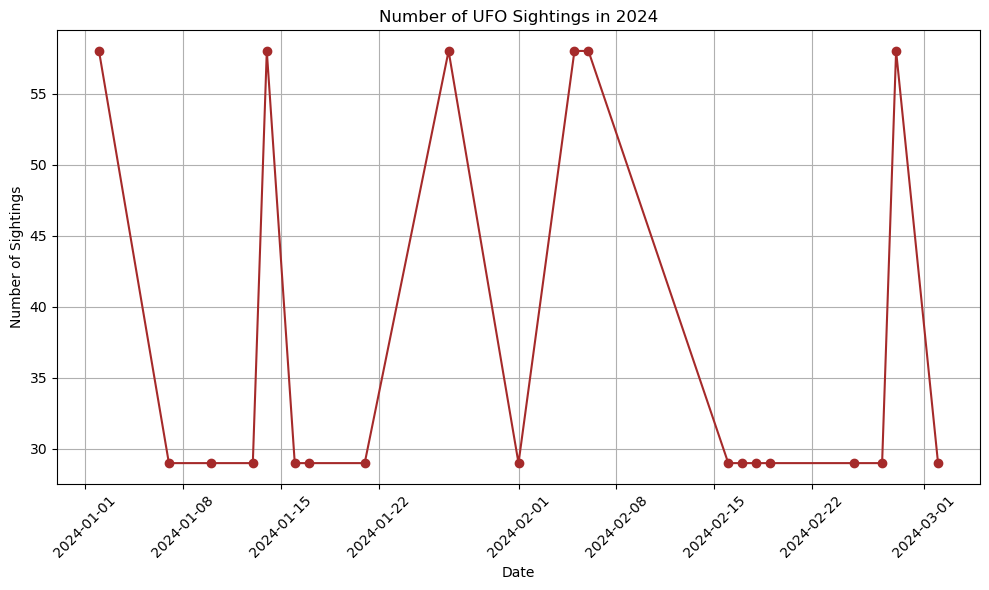

In [57]:
# Plotting 
plt.figure(figsize=(10, 6))
daily_counts_2024.plot(kind='line', marker='o', color='brown')

plt.title('Number of UFO Sightings in 2024')
plt.xlabel('Date')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()